<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Data</a></span></li><li><span><a href="#Cleaning-and-Preprocessing-Data" data-toc-modified-id="Cleaning-and-Preprocessing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning and Preprocessing Data</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Spliting-the-Data-for-Training-and-Testing" data-toc-modified-id="Spliting-the-Data-for-Training-and-Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spliting the Data for Training and Testing</a></span></li><li><span><a href="#Mean-Accuracy-On-Given-Test-Data-Set" data-toc-modified-id="Mean-Accuracy-On-Given-Test-Data-Set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mean Accuracy On Given Test Data Set</a></span></li><li><span><a href="#Confusion-Matrix-&amp;-Classification-Report" data-toc-modified-id="Confusion-Matrix-&amp;-Classification-Report-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Confusion Matrix &amp; Classification Report</a></span></li><li><span><a href="#ROC-Curve" data-toc-modified-id="ROC-Curve-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ROC Curve</a></span></li><li><span><a href="#AUC-scores" data-toc-modified-id="AUC-scores-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>AUC scores</a></span></li><li><span><a href="#Hyperparameter-tuning-with-GridSearchCV" data-toc-modified-id="Hyperparameter-tuning-with-GridSearchCV-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Hyperparameter tuning with GridSearchCV</a></span></li></ul></div>

This program performs two different logistic regression implementations on two different datasets of the format [float,float,boolean], one implementation is in this file and one from the sklearn library.

The program then compares the two implementations for how well the can predict the given outcome for each input tuple in the datasets.

# Introduction
**In this example, there are two features in this model: students' scores in two fifferent exams.  
 The target variable is used to classify if students are admitted or not admitted.   
 Logistic regression is applied to classify if a student with two exam scores will be admitted in future. **

In [31]:

import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# Importing Data

In [32]:
# scale larger positive and values to between -1,1 depending on the largest value in the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

# import data 
df = pd.read_csv("/Users/libolin/Downloads/LogisticRegression-master/data.csv", header=0)

# Cleaning and Preprocessing Data

In [33]:
# clean up data
df.columns = ["grade1","grade2","label"]


In [34]:
# formats the input data into two arrays
X = df[["grade1","grade2"]]
X = np.array(X)
print(X[1:10])
X = min_max_scaler.fit_transform(X)
print(X[1:10])

[[ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]
 [ 45.08327748  56.31637178]
 [ 61.10666454  96.51142588]
 [ 75.02474557  46.55401354]
 [ 76.0987867   87.42056972]
 [ 84.43281996  43.53339331]]
[[-0.99346735 -0.6105909 ]
 [-0.83406432  0.23923558]
 [-0.13647145  0.6320027 ]
 [ 0.40388679  0.31078429]
 [-0.56930879 -0.24668082]
 [-0.10998219  0.93091718]
 [ 0.28899369 -0.53268948]
 [ 0.31978216  0.66458158]
 [ 0.55868566 -0.62118485]]


In [35]:
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)
print(Y[1:10])

[ 0.  0.  1.  1.  0.  1.  1.  1.  1.]


# Data Visualization

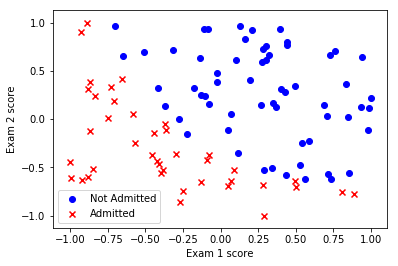

In [44]:
# visualize data, uncomment "show()" to run it
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

# Spliting the Data for Training and Testing

In [36]:
#Split Data creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

# Mean Accuracy On Given Test Data Set

In [37]:
# train sklearn  model 
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print 'score Scikit learn: ', clf.score(X_test,Y_test)


score Scikit learn:  0.848484848485


# Confusion Matrix & Classification Report

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[11  4]
 [ 1 17]]
             precision    recall  f1-score   support

        0.0       0.92      0.73      0.81        15
        1.0       0.81      0.94      0.87        18

avg / total       0.86      0.85      0.85        33



- Percision = TP/ (TP + FP)
- Recall = TP/ (TP + FN)

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models

# ROC Curve

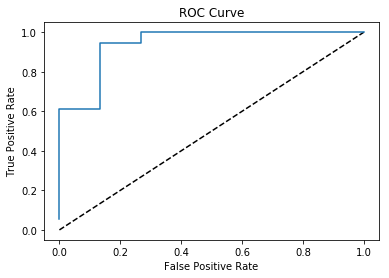

In [43]:
# Import necessary modules
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

** The resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. **


The Area under this ROC curve would be 0.5. This is one way in which the AUC, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

# AUC scores
Calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the dataset.

In [48]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(Y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf, X, Y, cv=3, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.940740740741
AUC scores computed using 5-fold cross-validation: [ 0.94285714  0.99615385  0.97307692]


# Hyperparameter tuning with GridSearchCV
Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune.
**A large C can lead to an overfit model, while a small C can lead to an underfit model.**

Use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space.

**RandomizedSearchCV**, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [49]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, Y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.051794746792312128}
Best score is 0.91
